<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/08_simple_rnn_model_for_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIMPLE RNN MODEL FOR FORECASTING**

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

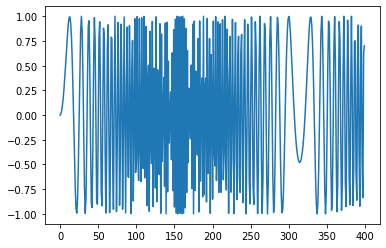

In [5]:
## make the data
series = np.sin((0.1 * np.arange(400)) ** 2)

## plot the series
plt.plot(series)
plt.show()

In [6]:
## build the dataset. Supervised Learning Dataset.
## lets see if we can use T past values to predict the next values.
T = 10
D = 1
X = []
Y = []

## loop over the range of len of series.
## and populate the X and Y.
for t in range(len(series) - T):
  #print(t)  ## 0 to 190
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)  ## make it NxT
Y = np.array(Y)
N = len(X)
print("X Shape : ", X.shape, "Y Shape : ", Y.shape)

X Shape :  (390, 10) Y Shape :  (390,)


PREPARE THE SIMPLE RNN MODEL

In [24]:
## prepare the model
print(X.shape)
## need to reshape the X to NxTxD to feed into a RNN model
X = X.reshape(-1,T,1)
print("Reshaped X is given :--", X.shape)

## make the model
i = Input(shape = (T,D))
x = SimpleRNN(50)(i)
x = Dense(1)(i)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate = 0.05)
)

## train the model.
r = model.fit(X[:-N//2], Y[:-N//2],
              batch_size = 32, epochs = 200,
              validation_data = (X[-N//2:], Y[-N//2:]))

(390, 10, 1)
Reshaped X is given :-- (390, 10, 1)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 dense_7 (Dense)             (None, 10, 1)             2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] - 1s 34ms/step - loss: 1.0843 - val_loss: 0.7597
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.7798 - val_loss: 0.5732
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.6120 - val_loss: 0.4878
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5465 - val_loss: 0.4669
Epoch 5/200
7/7 [===

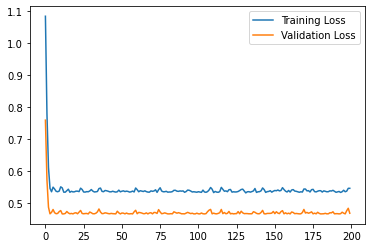

In [25]:
## plotting the loss
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show()

13/13 [==============================] - 0s 2ms/step
(390, 10, 1)


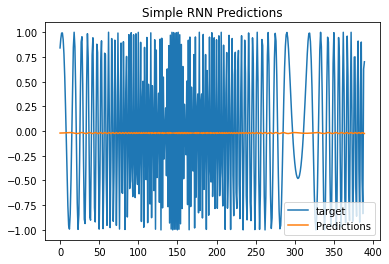

In [26]:
## do a one-step-forecast.
## even the one step forecast fails badly.
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

## plot the output vs predictions.
plt.plot(Y, label = "target")
plt.plot(predictions, label = "Predictions")
plt.title("Simple RNN Predictions")
plt.legend();
plt.show();

In [43]:
## multistep forecast
forecast = []
input_ = X[-N//2]


while len(forecast) < len(Y[-N//2:]):
  ## reshape the input_ to NxTxD
  f = model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)
  ## make the new input with the latest forecast.
  input_ = np.roll(input_, -1)
  input_[-1] = f



1/1 [==============================] - 0s 130ms/step


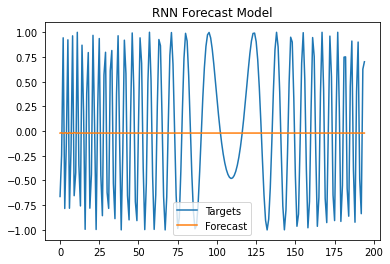

In [44]:
## plotting the figure
plt.plot(Y[-N//2:], label = "Targets")
plt.plot(forecast, label = "Forecast")
plt.title("RNN Forecast Model")
plt.legend();
plt.show();

Pretty Bad on Simple RNN model as well from the Notebook Observation.
But it should have Improved to a Certain Level.

***